# Matplotlib에서 3차원 플로팅하기
Matplotlib 안에 포함된 mplot3d 툴킷을 임포트해서 3차원의 플롯을 그릴 수 있다.

In [5]:
from mpl_toolkits import mplot3d

일반 축 생성 루틴에 projection='3d'키워드를 전달하여 3차원 축을 만들 수 있다.

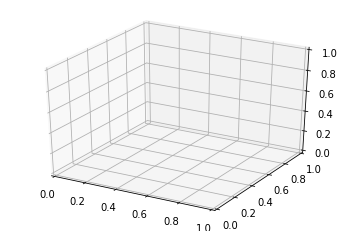

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

2차원의 플롯과 유사하게 ax.plot3D와 ax.scatter3D 함수를 이용해 3차원 플롯을 그릴 수 있다. 사용되는 방식이 2차원의 함수와 거의 같으니 참고하자. 여기서는 삼각함수 나선을 그린 후 선 근처에 무작위로 점을 그린다.

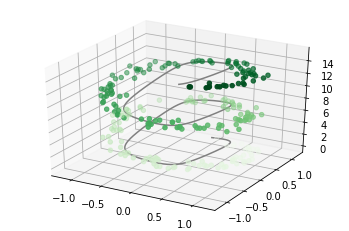

In [16]:
ax = plt.axes(projection='3d')

# 3차원 선을 위한 데이터
zline = np.linspace(0, 15, 1000)
xline = np.sin(xline)
yline = np.cos(zline)

# 3d 라인 플롯 작성
ax.plot3D(xline, yline, zline, 'gray')

# 3차원 산점도를 위한 데이터
zdata = 15 * np.random.random(250)
xdata = np.sin(zdata) + 0.1 * np.random.randn(250)
ydata = np.cos(zdata) + 0.1 * np.random.randn(250)

# 3d 산점도 작성
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

# Iris 데이터셋을 활용한 k-means 클러스터링과 3D 플로팅

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# iris 데이터셋 로드
iris = datasets.load_iris()

# 다음 코드를 실행항 iris 데이터셋의 설명을 볼 수 있다.
# print(iris.DESCR)

print('Features:'+str(iris.feature_names))
X = iris.data # 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비
# print(X)

print('Labels'+str(iris.target_names))
Y = iris.target # iris의 데이터 (0 : setosa, 1 : versicolor, 2 : virginica)
# print(Y)

Features:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels['setosa' 'versicolor' 'virginica']


(150, 4)
(150,)


Text(0.5, 0, 'petal length (cm)')

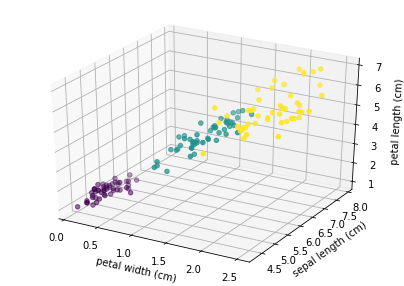

In [35]:
# 데이터의 형태 확인
print(X.shape)
print(Y.shape)

# 3d 플로팅을 위한 모듈 임포트
from mpl_toolkits import mplot3d

plt.figure('Iris dataset', figsize=(7,5))
ax = plt.axes(projection = '3d')
# x : 꽃잎너비, y : 꽃받침길이, z : 꽃잎길이, 색상 : 꽃의 종류으로 구분"""
ax.scatter(X[:,3],X[:,0],X[:,2],c=Y);
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('sepal length (cm)')
ax.set_zlabel('petal length (cm)')

Accuracy:24.0


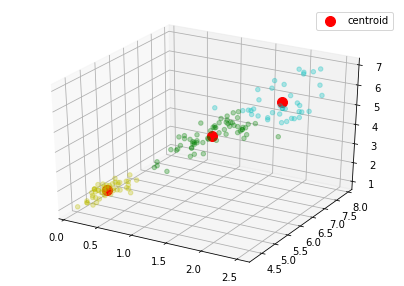

In [98]:
# k-means 모델을 사용하기 위한 모듈 임포트
from sklearn.cluster import KMeans

# 클러스터의 수를 지정
k_means = KMeans(n_clusters=3)

# 데이터를 학습시킨다.
k_means.fit(X)

# 모델이 클러스터링을 수행 한다(별도의 검증데이터 없이 바로 학습데이터를 활용함).
k_means_predicted = k_means.predict(X)

# 정확도 출력
accuracy = round((np.mean(k_means_predicted==Y))*100)
print('Accuracy:'+str(accuracy))

# 클러스터에서 중앙값 데이터를 저장
centroids = k_means.cluster_centers_

target_names = iris.target_names

plt.figure('Iris dataset', figsize=(7,5))
ax = plt.axes(projection = '3d')

# 검증된 내용을 부울행렬로 구성한뒤 데이터 분류
pred_part1 = k_means_predicted == 0
pred_part2 = k_means_predicted == 1
pred_part3 = k_means_predicted == 2

# 모델이 구분한 데이터를 산포도로 출력
ax.scatter(X[pred_part1, 3], 
           X[pred_part1, 0],
           X[pred_part1, 2], 
           alpha=0.3, s=20, c='g')

ax.scatter(X[pred_part2, 3], 
           X[pred_part2, 0],
           X[pred_part2, 2], 
           alpha=0.3, s=20, c='y')

ax.scatter(X[pred_part3, 3], 
           X[pred_part3, 0],
           X[pred_part3, 2], 
           alpha=0.3, s=20, c='c')


# 중앙값 데이터를 출력한다.
ax.scatter(centroids[0,3],centroids[0,0],centroids[0,2],
           c='r', s=100, label='centroid')
ax.scatter(centroids[1,3],centroids[1,0],centroids[1,2],
           c='r', s=100)
ax.scatter(centroids[2,3],centroids[2,0],centroids[2,2],
           c='r', s=100)

ax.legend()

# Mean Shift 클러스터링

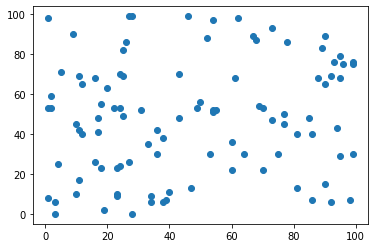

In [131]:
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 생성
x_p = np.random.randint(100, size=100)
y_p = np.random.randint(100, size=100)
pos = np.c_[x_p, y_p]

plt.scatter(x_p, y_p)

## Mean-Shift Clustering
Mean Shift 알고리즘은 데이터의 밀도를 파악하여 클러스터를 구성하는 알고리즘 입니다. 특정 데이터를 중심으로 일정 범위 안에 속한 데이터가 많으면 해당 데이터를 중심점으로 클러스터를 생성합니다. 클러스터의 갯수를 지정하지 않아도 클러스터를 구성할 수 있습니다. 자세한 원리는 아래 링크를 참고하세요.

- https://www.nextobe.com/single-post/2018/02/26/데이터-과학자가-알아야-할-5가지-클러스터링-알고리즘

[0 0 0 0 2 1 1 2 1 0 0 1 0 0 3 1 0 1 2 0 1 0 0 3 3 2 3 0 2 3 3 2 1 2 2 1 2
 2 1 3 0 2 2 2 1 0 1 1 2 1 3 0 1 0 2 3 3 0 0 1 0 2 0 0 0 3 0 0 1 1 0 0 3 0
 0 2 0 0 0 1 1 0 0 0 0 1 0 0 2 0 1 3 1 1 1 1 0 3 1 0]


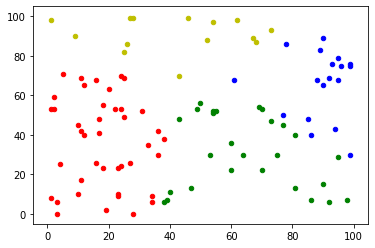

In [148]:
# 클러스터링 알고리즘에 학습
clustering = MeanShift(bandwidth=30)
clustering.fit(pos)

print(clustering.labels_)

labels = clustering.labels_

# pos[labels == 0, 0] 0번 클러스터의 x좌표
# pos[labels == 2, 0] 2번 클러스터의 y좌표
plt.scatter(pos[labels == 0, 0], pos[labels == 0, 1], c='r', s=20)
plt.scatter(pos[labels == 1, 0], pos[labels == 1, 1], c='g', s=20)
plt.scatter(pos[labels == 2, 0], pos[labels == 2, 1], c='b', s=20)
plt.scatter(pos[labels == 3, 0], pos[labels == 3, 1], c='y', s=20)

# 결정트리 시각화하기
pydotplus모듈과 graphviz를 설치해야 합니다. 명령프롬프트(터미널)에서 다음 명령으로 모듈을 설치하세요.

- conda install -c anaconda graphviz
- conda install -c anaconda pydotplus

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [162]:
# 아이리스 데이터 셋을 활용합니다
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [163]:
# 결정트리 모듈 객체를 생성합니다
clf = DecisionTreeClassifier(random_state=0)

# 데이터를 학습합니다.
model = clf.fit(X, y)

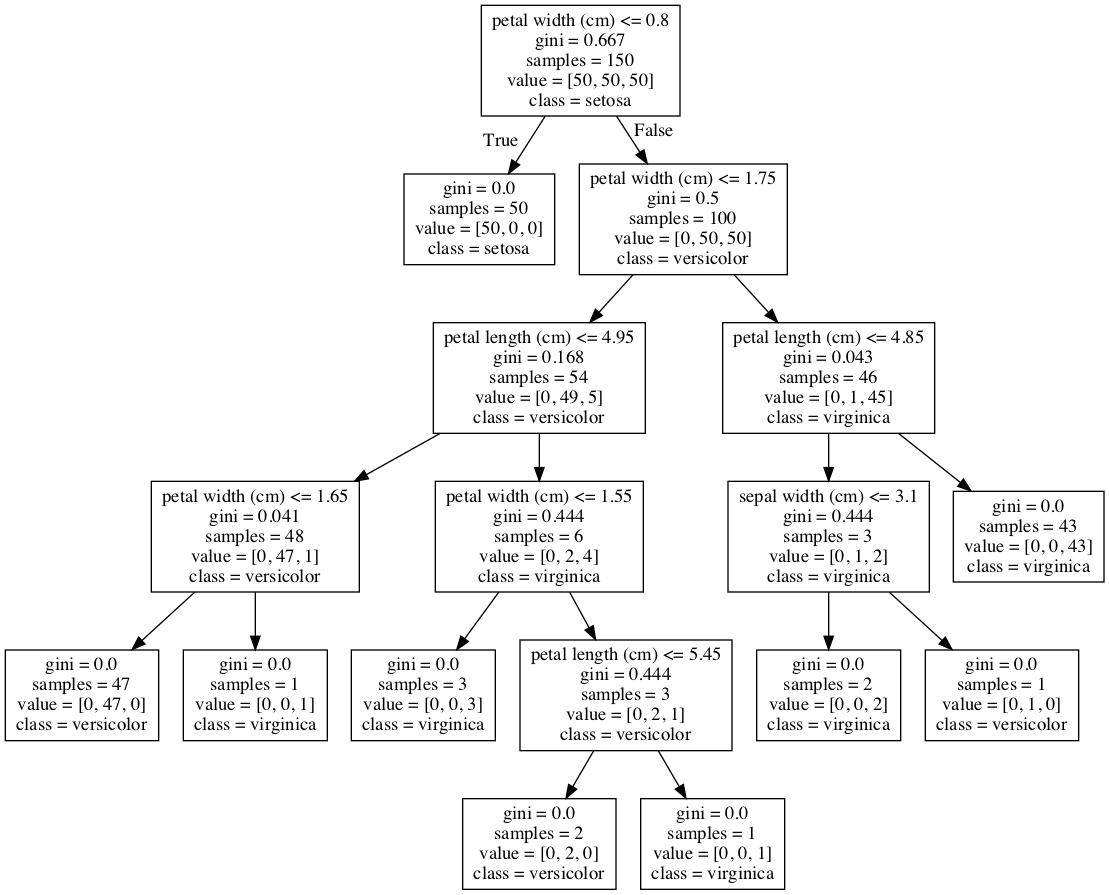

In [164]:
# 트리의 구조를 데이터화 합니다
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)

# 트리 구조 데이터를 이미지로 구성합니다.
graph = pydotplus.graph_from_dot_data(dot_data)  

# 이미지를 출력합니다.
Image(graph.create_png())